# Foundations of Data Mining: Assignment 3
This document contains the solutions and descriptions of the third assignment set for the Foundation of Data Mining (2IMW30) course by Eindhoven University of Technology. 

- Leontien Cremers - 0818302
- Joël Goossens - 0862841

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

## 1 Random Projections with 1-NN (6 points, 3+3)

Implement random projections for dimensionality reduction as follows.
Randomly generate a $k \times d$ matrix $\bf R$ by choosing its coefficients
$$
r_{i,j}=
\begin{cases}
+\frac{1}{{\sqrt{d}}} \quad \text{with probability}\quad &\frac{1}{2}\\
-\frac{1}{\sqrt{d}} \quad \text{with probability} \quad & \frac{1}{2}
\end{cases}
$$ 
Let $f:\mathbb{R}^d \rightarrow \mathbb{R}^k$ denote the linear mapping function that 
multiplies a $d$-dimensional vector with this matrix $f(p)={\bf R}p$.
For the following exercises use the same data set as was used for Assignment 1 (MNIST). 
Use the following values of $k=45,90,400$ in your experiments.  
You should _not_ use sklearn.random_projection for this assignment.


In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

In [3]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
# Get the predictors X and the labels y
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); 

In [4]:
# Randomly sample with probability 1/2
np.random.randint(0,2)

1

The code below offers an implementation for this part of the assignment. Firstly the matrix R is constructed based on the 'k' and 'd' variables, where k is varied between 45,90,400 and d is 784, the number of features for the 28x28 images. Once these are created all 500 images are compared to one another except for when the image is exactly the same to make sure no division by 0 occurs. This comparison takes the euclidean distance when both images are multiplied on R (function f(p)) as well as the euclidean distance between the two base images. The former is then divided by the latter to obtain the requested value. These values are then plotted in a histogram. Additional explanations on the outcomes are found below. 

Average for the upper part is
616.913208633
Average for computed values is
0.241958062065


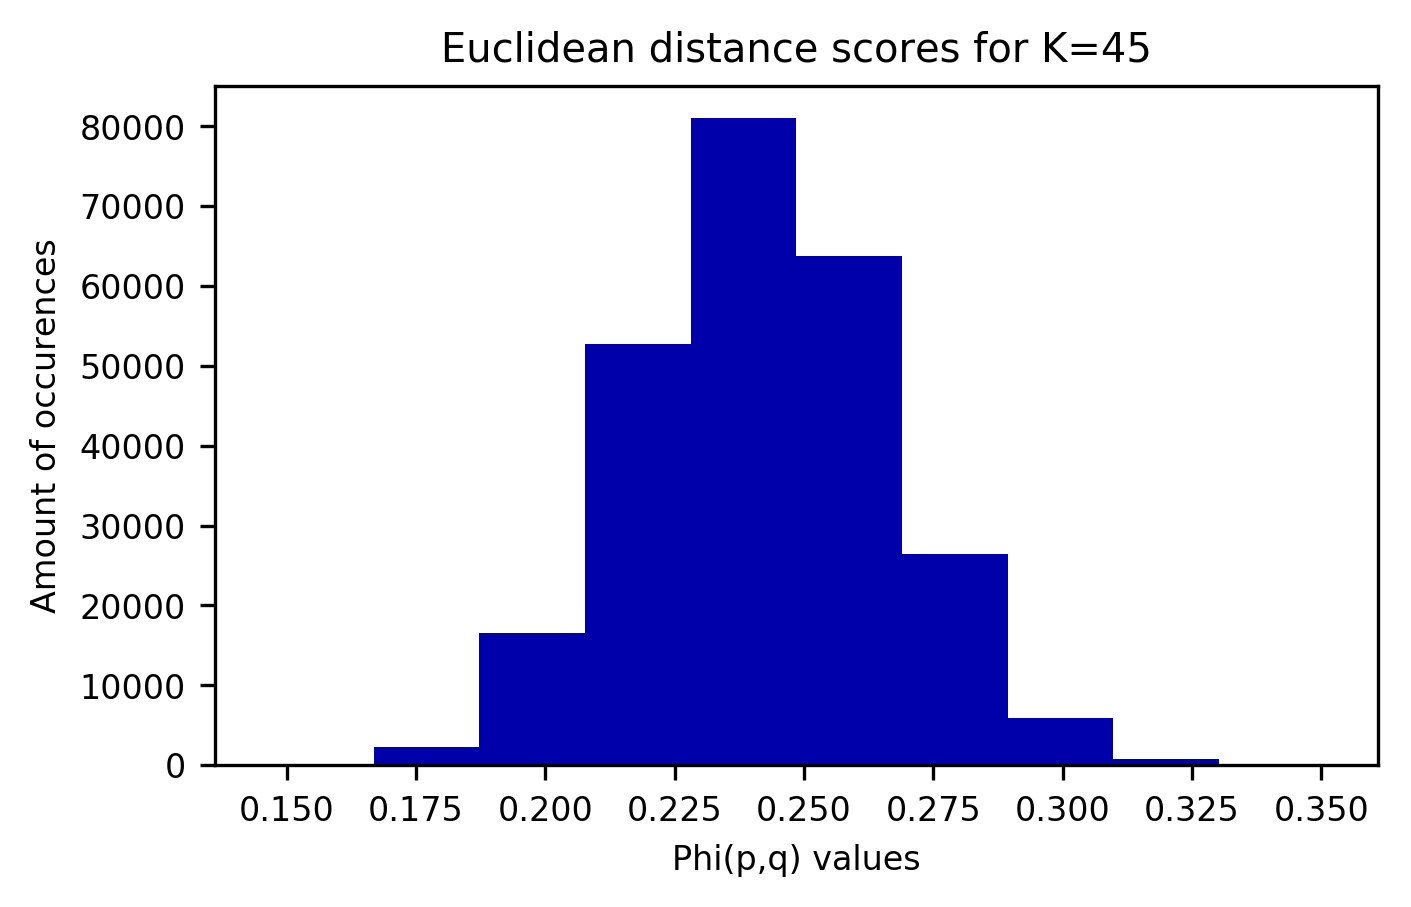

In [46]:
from preamble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import math


#Standard OML get data stuff
oml.config.apikey = '366585f9ec2435e0f2543d5175e1bac5'
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
# Get the predictors X and the labels y
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)
#Take only first 500 elements
X = X[:500]
y = y[:500]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, train_size=0.8)

#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=45

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(d)] for bbbbb in range(k)]
for i in range(0,k):
    for j in range(0,d):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/math.sqrt(d)
        else:
            rMatrix[i][j] = -(1/math.sqrt(d))

storepart1 = []
storepart2 = []

storeEDistances = []

#Loop over all combos that do not include the same image
for i in range(0,500):
    for j in range(0,500):
        #Skip if same image
        if(i==j):
            continue
        else:
            # Resize the thing to make it acceptable by np.dot
            firstIMG = np.array(X[i],None)
            secondIMG = np.array(X[j],None)

            fpX1 = np.dot(rMatrix, firstIMG)
            fpX2 = np.dot(rMatrix, secondIMG)

            part1 = np.linalg.norm(abs(fpX1 - fpX2))
            part2 = np.linalg.norm(firstIMG - secondIMG)

            part3 = np.divide(part1, part2)

            storeEDistances.append(part3)
            storepart1.append(part1)
            storepart2.append(part2)

print("Average for the upper part is")
print(np.mean(storepart1))
# plt.hist(storepart1)
# plt.show()

print("Average for computed values is")
print(np.mean(storeEDistances))

plt.hist(storeEDistances)
plt.xlabel('Phi(p,q) values')
plt.ylabel('Amount of occurences')
plt.title('Euclidean distance scores for K=45')

plt.show()

Average for the upper part is
865.50744629
Average for computed values is
0.339565341496


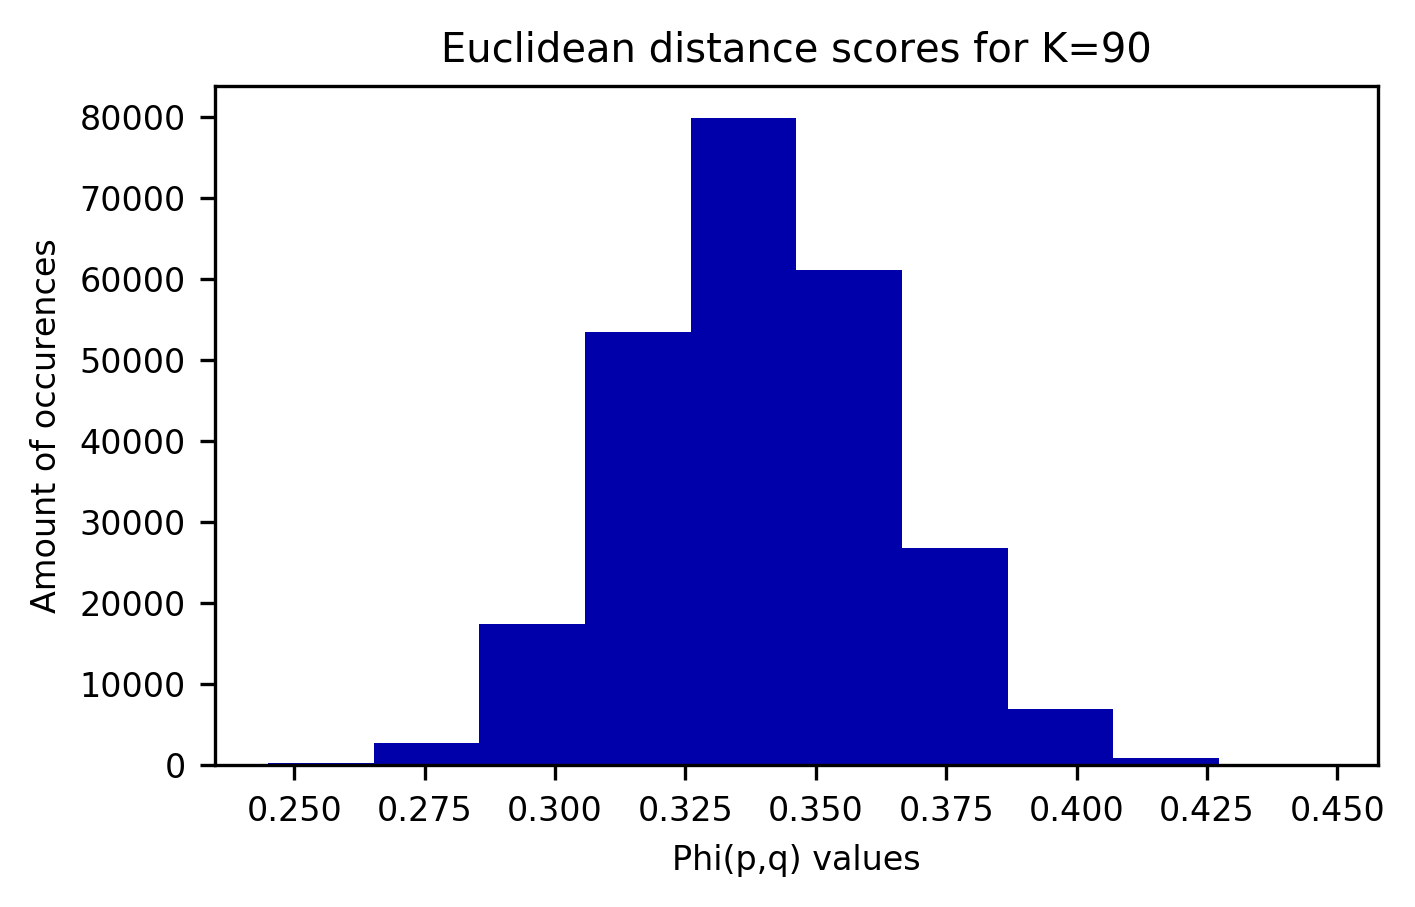

In [48]:
#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=90

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(d)] for bbbbb in range(k)]
for i in range(0,k):
    for j in range(0,d):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/math.sqrt(d)
        else:
            rMatrix[i][j] = -(1/math.sqrt(d))

storepart1 = []
storepart2 = []

storeEDistances = []

#Loop over all combos that do not include the same image
for i in range(0,500):
    for j in range(0,500):
        #Skip if same image
        if(i==j):
            continue
        else:
            # Resize the thing to make it acceptable by np.dot
            firstIMG = np.array(X[i],None)
            secondIMG = np.array(X[j],None)

            fpX1 = np.dot(rMatrix, firstIMG)
            fpX2 = np.dot(rMatrix, secondIMG)

            part1 = np.linalg.norm(abs(fpX1 - fpX2))
            part2 = np.linalg.norm(firstIMG - secondIMG)

            part3 = np.divide(part1, part2)

            storeEDistances.append(part3)
            storepart1.append(part1)
            storepart2.append(part2)

print("Average for the upper part is")
print(np.mean(storepart1))
# plt.hist(storepart1)
# plt.show()

print("Average for computed values is")
print(np.mean(storeEDistances))

plt.hist(storeEDistances)
plt.xlabel('Phi(p,q) values')
plt.ylabel('Amount of occurences')
plt.title('Euclidean distance scores for K=90')

plt.show()

Average for the upper part is
1806.34006861
Average for computed values is
0.708323861961


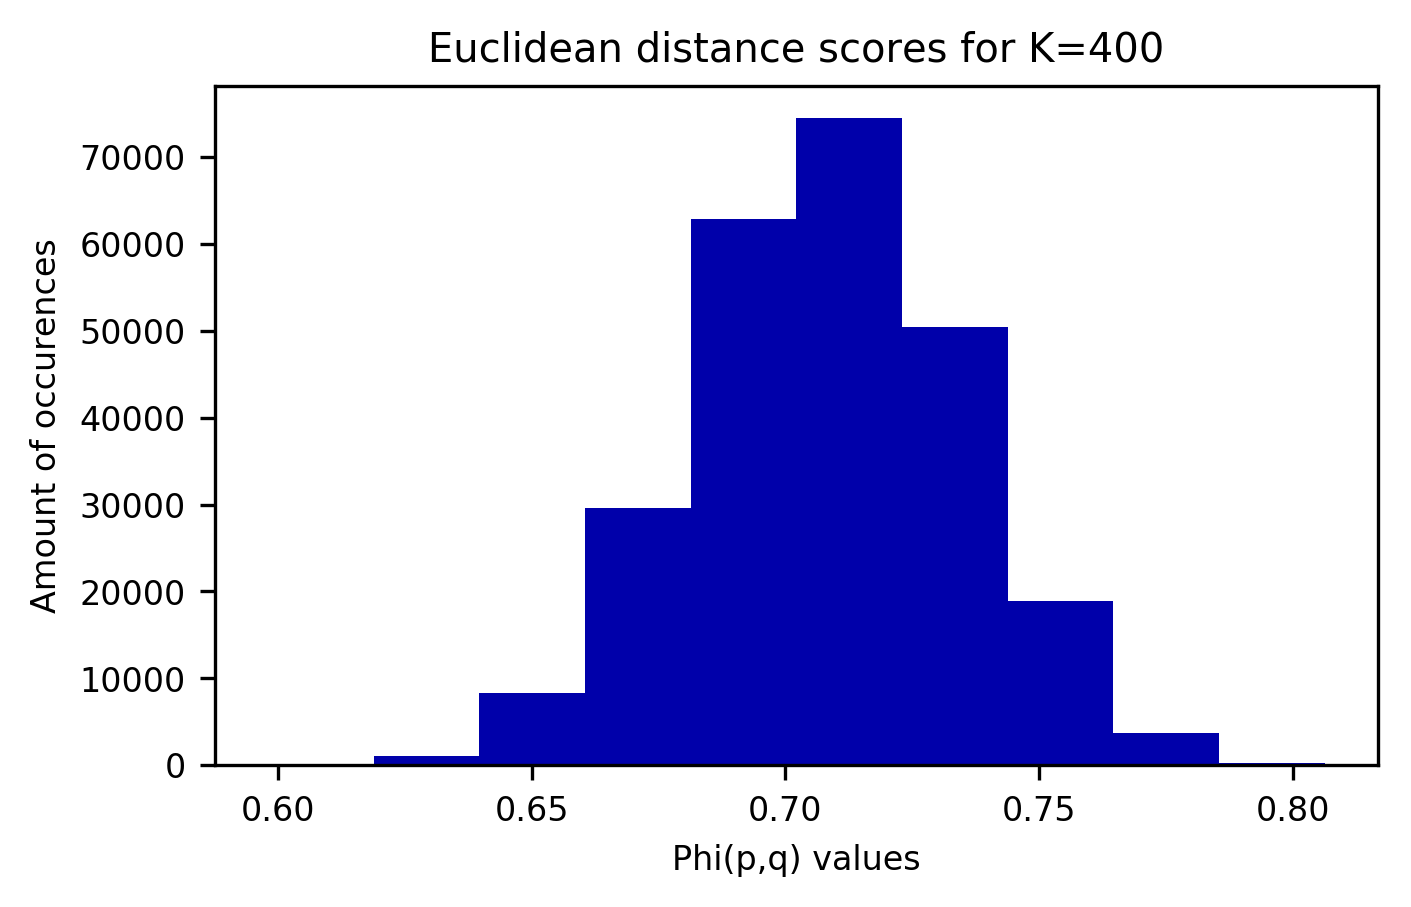

In [50]:
#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=400

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(d)] for bbbbb in range(k)]
for i in range(0,k):
    for j in range(0,d):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/math.sqrt(d)
        else:
            rMatrix[i][j] = -(1/math.sqrt(d))

storepart1 = []
storepart2 = []

storeEDistances = []

#Loop over all combos that do not include the same image
for i in range(0,500):
    for j in range(0,500):
        #Skip if same image
        if(i==j):
            continue
        else:
            # Resize the thing to make it acceptable by np.dot
            firstIMG = np.array(X[i],None)
            secondIMG = np.array(X[j],None)

            fpX1 = np.dot(rMatrix, firstIMG)
            fpX2 = np.dot(rMatrix, secondIMG)

            part1 = np.linalg.norm(abs(fpX1 - fpX2))
            part2 = np.linalg.norm(firstIMG - secondIMG)

            part3 = np.divide(part1, part2)

            storeEDistances.append(part3)
            storepart1.append(part1)
            storepart2.append(part2)

print("Average for the upper part is")
print(np.mean(storepart1))
# plt.hist(storepart1)
# plt.show()

print("Average for computed values is")
print(np.mean(storeEDistances))

plt.hist(storeEDistances)
plt.xlabel('Phi(p,q) values')
plt.ylabel('Amount of occurences')
plt.title('Euclidean distance scores for K=400')

plt.show()

As one can see by looking at the different histograms the overall structure of the bars is very similar between the different $K$ values. Especially for $K$ = 90 and $K$ = 400 the shape looks exactly identical, and for $K$ = 45 the biggest bar is now on the right in the middle instead of the left with the bar following it being nearer to 40000 occurances instead of the 30000 to which it is closer in the other histograms. As one might have noticed there is one large difference between the different histograms, namely the values along the X axis. Seeing as how ${\|p-q\|}$ is always the same value no matter what $K$ is, the cause for this has to lie in the upper part of the equation, namely ${\|f(p)-f(q)\|}$. This seems to be caused by the higher K values leading to more features being available to the created values, which makes them more distinct and also allows the Euclidean distance to increase due to the formula now being able to more clearly assess that the two points are indeed very different from one another. This then leads to higher overall values as the upper half of the equation increases while the bottom stays the same.

We know that between the different $K$-values the means are  0.241958062065, 0.339565341496, and 0.708323861961 for the computed values, which is incidentally what the values are centered around for 45, 90, and 400 as $K$ values. Between 90 and 400 the computed value is slightly more than doubled, while between 45 and 90 it increases by about 40%. The computed value thus seems to increase sharply in the beginning while not increasing as much for later, larger values. However, the median value always seems to increase as $K$ increases. Based on the previous trend and knowing that $d$ lies at 784, the expected value for $d$ will likely lie between 0.85 and 1.0. 

### Study the effect on classification
Compare the performance of a $1$-NN classifier with and without random projection. Report multi-class confusion matrix, precision and recall for each class with and without projection and for each value of $k$. Evaluate your findings with respect to the use of random projections and classification.

In the following 4 code blocks the requested performance metrics are calculated and returned for the base dataset, and when K is 45, 90 or 400 and the original dataset is adapted based on R to achieve the random projection. It should be noted that it is unclear if this part should still only use the first 500 samples of the dataset, it is assumed that this is the case. Performance on a bigger set (e.g. first 2500 samples) can lead to a situation where K=90 and K=400 are able to match the performace of using the entire range of features. If this is the case using only 500 samples can be seen below. Finally, it should also be noted that the train/test split is taken to be 80/20, and that this can also influence the discussed results. 

In [17]:
###Part 2
# train a classifier on the initial values
originalModel = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
originalModel.fit(X_train, y_train)
# evaluate the model and update the list of accuracies
print(metrics.classification_report(originalModel.predict(X_test), y_test))
print(metrics.confusion_matrix(originalModel.predict(X_test),y_test))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91         6
          1       0.92      0.79      0.85        14
          2       0.82      0.90      0.86        10
          3       1.00      0.92      0.96        12
          4       1.00      0.86      0.92        14
          5       0.70      0.88      0.78         8
          6       1.00      1.00      1.00         7
          7       0.70      1.00      0.82         7
          8       0.86      1.00      0.92         6
          9       1.00      0.94      0.97        16

avg / total       0.92      0.90      0.90       100

[[ 5  0  0  0  0  0  0  1  0  0]
 [ 0 11  1  0  0  2  0  0  0  0]
 [ 0  1  9  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  1  0  0  0  0]
 [ 0  0  1  0 12  0  0  1  0  0]
 [ 0  0  0  0  0  7  0  0  1  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  1  0 15]]


In [27]:
#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=45

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(k)] for bbbbb in range(d)]
for i in range(0,d):
    for j in range(0,k):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/d
        else:
            rMatrix[i][j] = -(1/d)

# create the random projection
fP= np.dot(X,rMatrix)
X_trainRand, X_testRand, y_trainRand, y_testRand = train_test_split(fP, y, random_state=30, train_size=0.8)
# train a classifier on the sparse random projection
rpModel = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
rpModel.fit(X_trainRand, y_trainRand)
# evaluate the model and update the list of accuracies
predictLabels = rpModel.predict((X_testRand))
print(metrics.classification_report(predictLabels, y_testRand))
print(metrics.confusion_matrix(predictLabels,y_testRand))

             precision    recall  f1-score   support

          0       0.80      0.80      0.80         5
          1       0.92      0.69      0.79        16
          2       0.64      1.00      0.78         7
          3       0.91      0.91      0.91        11
          4       0.83      0.77      0.80        13
          5       0.50      0.83      0.62         6
          6       0.86      0.86      0.86         7
          7       0.60      0.67      0.63         9
          8       0.57      0.67      0.62         6
          9       0.93      0.70      0.80        20

avg / total       0.80      0.77      0.78       100

[[ 4  0  0  0  0  0  0  0  0  1]
 [ 0 11  2  0  0  1  1  1  0  0]
 [ 0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  1  0  0  0  0]
 [ 0  0  1  0 10  0  0  2  0  0]
 [ 0  0  0  0  0  5  0  0  1  0]
 [ 0  0  0  0  0  1  6  0  0  0]
 [ 1  1  0  0  0  1  0  6  0  0]
 [ 0  0  1  0  0  1  0  0  4  0]
 [ 0  0  0  1  2  0  0  1  2 14]]


In [28]:
#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=90

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(k)] for bbbbb in range(d)]
for i in range(0,d):
    for j in range(0,k):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/d
        else:
            rMatrix[i][j] = -(1/d)

# create the random projection
fP= np.dot(X,rMatrix)
X_trainRand, X_testRand, y_trainRand, y_testRand = train_test_split(fP, y, random_state=30, train_size=0.8)
# train a classifier on the sparse random projection
rpModel = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
rpModel.fit(X_trainRand, y_trainRand)
# evaluate the model and update the list of accuracies
predictLabels = rpModel.predict((X_testRand))
print(metrics.classification_report(predictLabels, y_testRand))
print(metrics.confusion_matrix(predictLabels,y_testRand))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91         6
          1       0.92      0.79      0.85        14
          2       0.73      0.89      0.80         9
          3       0.91      0.83      0.87        12
          4       0.92      0.79      0.85        14
          5       0.70      0.88      0.78         8
          6       1.00      1.00      1.00         7
          7       0.70      0.78      0.74         9
          8       0.71      1.00      0.83         5
          9       0.73      0.69      0.71        16

avg / total       0.83      0.82      0.82       100

[[ 5  0  0  0  0  0  0  0  1  0]
 [ 0 11  1  0  0  2  0  0  0  0]
 [ 0  1  8  0  0  0  0  0  0  0]
 [ 0  0  1 10  0  1  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  1  2]
 [ 0  0  1  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  1  1  0  0  3  0 11]]


In [31]:
#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=400

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(k)] for bbbbb in range(d)]
for i in range(0,d):
    for j in range(0,k):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/d
        else:
            rMatrix[i][j] = -(1/d)

# create the random projection
fP= np.dot(X,rMatrix)
X_trainRand, X_testRand, y_trainRand, y_testRand = train_test_split(fP, y, random_state=30, train_size=0.8)
# train a classifier on the sparse random projection
rpModel = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
rpModel.fit(X_trainRand, y_trainRand)
# evaluate the model and update the list of accuracies
predictLabels = rpModel.predict((X_testRand))
print(metrics.classification_report(predictLabels, y_testRand))
print(metrics.confusion_matrix(predictLabels,y_testRand))

             precision    recall  f1-score   support

          0       1.00      0.71      0.83         7
          1       0.92      0.73      0.81        15
          2       0.82      0.90      0.86        10
          3       0.91      0.91      0.91        11
          4       1.00      0.92      0.96        13
          5       0.70      0.88      0.78         8
          6       0.86      1.00      0.92         6
          7       0.70      1.00      0.82         7
          8       0.86      1.00      0.92         6
          9       1.00      0.88      0.94        17

avg / total       0.90      0.88      0.88       100

[[ 5  0  1  0  0  0  0  1  0  0]
 [ 0 11  1  0  0  2  1  0  0  0]
 [ 0  1  9  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  1  0  0  0  0]
 [ 0  0  0  0 12  0  0  1  0  0]
 [ 0  0  0  0  0  7  0  0  1  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  1  0  0  0  1  0 15]]


As one can see from the results, the base dataset offers the best overall precision and recall values when using 1-Nearest Neighbor classification. In general the results seem to improve as K gets higher when looking at the average precision and recall values, which indicates that if there are additional relevant features present that this improves the general performance for KNN despite the large number of features which could lead to more blurred distances between the different neighbors. It seems to be the case that here the dataset does indeed have distinct neighbors even with a large amount of features, which are grouped together well enough such that additional features always lead to increased performance. 

With regard to the individual classes, precision and recall can only be matched at best using any of the K values compared to when no random projection is used. In terms of precision there are some digits that benefit more from the higher K values than others, in particular the 0, 2, 5, and 8 seem to be less likely missclassified as additional features become available. These values are both slightly more complex than most in their structure while also not being present too often in the test set, making a single missclassification have a heavy impact on the overall score. 

In terms of recall there are some differences between the K values. A higher K value does not necesarily lead to a higher recall for every digit, as for example 2 has a 1.0 recall value when K is 45, while it is 0.89 for K=90 and 0.9 for K=400. Similarily, 0 has a better recall value for the lower K values as well. This thus indicates that the additional features make it so that other numbers might be guessed if they are ambiguous than when there are fewer features present, leading to an increase of recall for some numbers while for others it decreases. 

When looking at the multi-class confusion matrices that the number which is most often used wrongly, leading to a poor precision, is 5. In particular there are 2 missclassifications where a 2 is identifiedas a 5 which seems to be present for all 4 methods used, except when K=45. Similarily there is always one occurance of a 4 being identified as a 5, indicating that this specific instance likely has a lot of features that make it similar to a 4 making it always picked up on. For the better performing approaches there is not really one number which is the default guess in case the model does not know what to do, as in most cases any incorrect number is either used 0 or 1 times, and very rarely twice. A lower K value can lead to quite some additional 1's spread accross the matrix due to the lesser performance. These are not really concentrated on a certain part of the matrix but spread rarther evenly, indicating that more errors are made with respect to most if not all digits.  

## 2 PCA of a handwritten digits (7 points, 3+2+2)
Analyze the first two principal components of the class with label $4$ of the MNIST data set (those are images that each depict a handwritten "4"). Perfom the steps (a), (b), (c) described below. Note that these steps are similar to the analysis given in the lecture. Include all images and plots in your report. You may use sklearn.decomposition.PCA for this assignment. Do not scale the data.

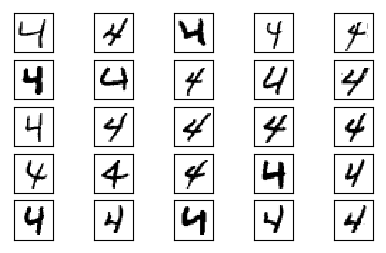

In [6]:
# build a list of figures on a 5x5 grid for plotting
def buildFigure5x5(fig, subfiglist):
    
    for i in range(0,25):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(5,5,i+1)
        imgplot =plt.imshow(pixels, cmap='gray_r')
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return

# find the first 25 instances with label '4' and plot them
imgs = np.empty([25, 28*28], dtype='float')
j=0
for i in range(0,len(X)):
    if(y[i] == 4) and j < 25:
        imgs[j] = np.array(X[i], dtype='float')
        j += 1

buildFigure5x5(plt.figure(1),imgs)
plt.show()

### Step (a)
 Generate a scatter plot of the data in the space spanned by the first two principal components of PCA. Reconstruct $25$ points on a $5 \times 5$ grid in this space that cover the variation of the data. Render each point as an image. Arrange the images in a $5 \times 5$ grid.


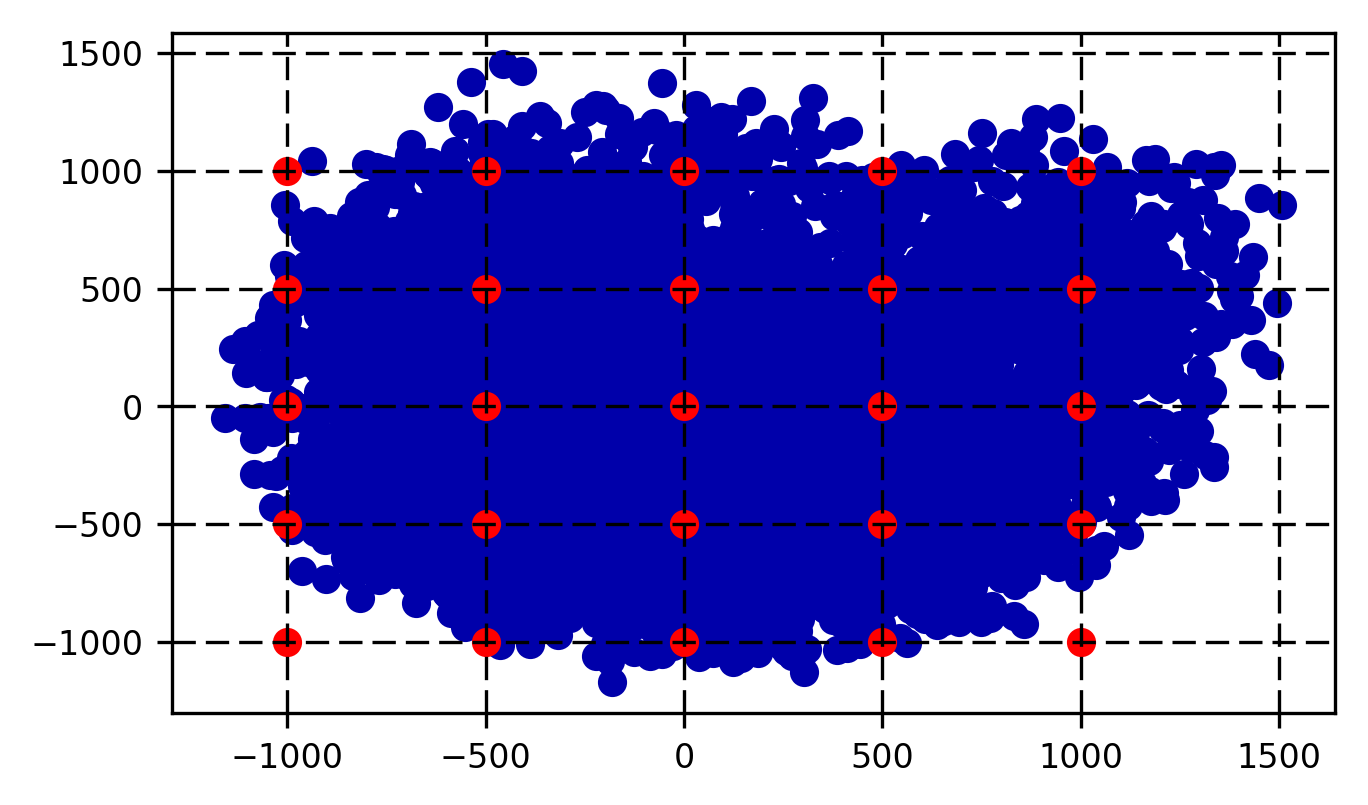

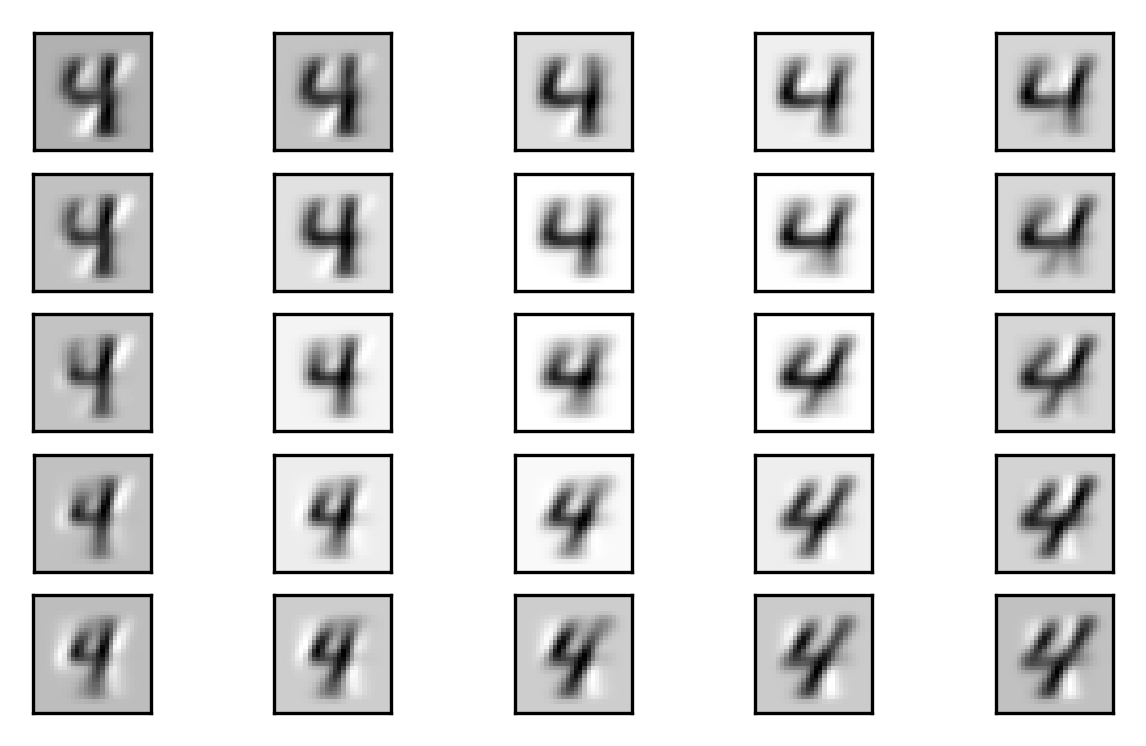

In [20]:
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import scipy
import numpy as np
import matplotlib.pyplot as plt

#Standard OML get data stuff
oml.config.apikey = '366585f9ec2435e0f2543d5175e1bac5'
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
# # Get the predictors X and the labels y
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute);

# smallerX, _, smallery, _ = train_test_split(X, y, train_size=0.15, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(smallerX, smallery, random_state=30, train_size=0.8)

# Find all the fours in the dataset
fourindexes = np.where(y == 4)
Xfours = X[fourindexes]
yfours = y[fourindexes]


# build a list of figures on a 5x5 grid for plotting
def buildFigure5x5(fig, subfiglist):

    for i in range(0 ,25):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig. add_subplot(5,5,i+1)
        imgplot =plt. imshow(pixels, cmap='gray_r')
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return

#Get a PCA with the first two principal components
pca = PCA(n_components=2)
pca.fit(Xfours)
Xfours = pca.transform(Xfours)
#Plot the results in a scatterplot
plt.scatter(Xfours[:,0],Xfours[:,1])
# plt.show()

#Reconstructing 25 points on a 5x5 grid.
xRow = [1000, 500, 0, -500, -1000]
yRow = [-1000, -500, 0, 500, 1000]

for i in xRow:
    for j in yRow:
        plt.scatter(i,j,color='r')
plt.grid(b=True, which='major', color='black', linestyle='--',)

plt.show()

count = 1
#Get dem pixel arts --> this part doesn't seem right.
for i in xRow:
    for j in yRow:
        usedValue = pca.inverse_transform([i,j])
        pixels = np.array(usedValue, dtype='float')
        pixels = pixels.reshape((28, 28))
        a = plt.figure(2).add_subplot(5, 5, count)
        imgplot = plt.imshow(pixels, cmap='gray_r')
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
        count += 1
plt.show()

As one can see in the code first the indexes are obtained from where the label is 4 and all elements not included in this list of indexes are discarded. Then a PCA is created with 2 components, it is fitted on the X values of the set containing only 4s, and then those X values are transformed using the PCA.

The resulting points can be found in the scatterplot, on which a grid is also drawn. From this grid we take 25 points, from -1000 to 1000 on both of the axis. Steps are taken of 500, resulting in the values -1000, -500, 0, 500, and 1000 being used in all possible combinations. These are marked as red dots on the scatterplot to make it clearerhow they relate to the rest of the data points. As one can see most of the data points fall into this grid, with the main exceptions being some points on the right and the top of the chosen grid, but these are only a relatively small portion of the points and should not significantly impact the analysis. 

Now that the points are chosen, they have to be rendered as an image. This is done by calling the inverse_transform method of the PCA which tries to reconstruct a feasible set of parameters for the given input, which are in this case the grid points. The results are then plotted in the same arrangement as the red dots in the scatterplot. As one can see the results are relatively blurry due to the PCA having to estimate the values, and as these are only approximations they are not that sharp. Despite this it is still very clearly visible that the produced images resemble an arangement of slightly differently drawn 4s.

### Step (b) 
For each of the reconstructed points, find the original instance that is closest to it in the projection on the first two components (measured using Euclidean distance). Render the instances arranged in a $5 \times 5$ grid such that their position matches the rendering in (a).


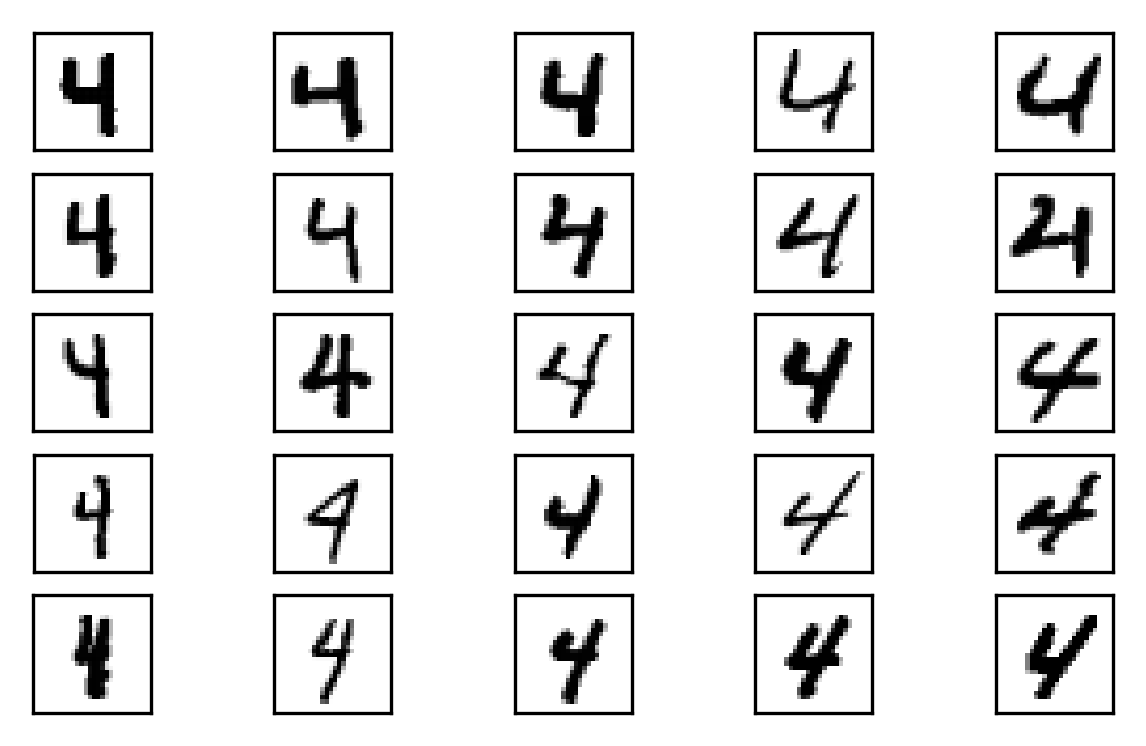

In [8]:
count = 1
for i in xRow:
    for j in yRow:
        getDist = scipy.spatial.distance.cdist(Xfours, [(i,j)])
        minimalDistance = np.argmin(getDist)
        pixels = np.array(X[fourindexes][minimalDistance], dtype='float')
        pixels = pixels.reshape((28, 28))
        a = plt.figure(3).add_subplot(5, 5, count)
        imgplot = plt.imshow(pixels, cmap='gray_r')
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
        count += 1

plt.show()

In the figure above one can see the points which were nearest to the red points in the scatterplot shown before. These are obtained using the Euclidean distance (scipy.spatial.distance.cdist does this). Once the nearest value was obtained it is added as a subplot, and once all 25 points have been found they are presented as seen here. As one can see the blurriness present in the previous question has now completely disappeared as the original dataset items are more clearly defined. 

### Step (c)
Render the mean and the first two principal components as images. What is your interpretation of the first two components, i.e., which aspect of the data do they capture? Justify your interpretation, also using your results of Steps (a) and (b).


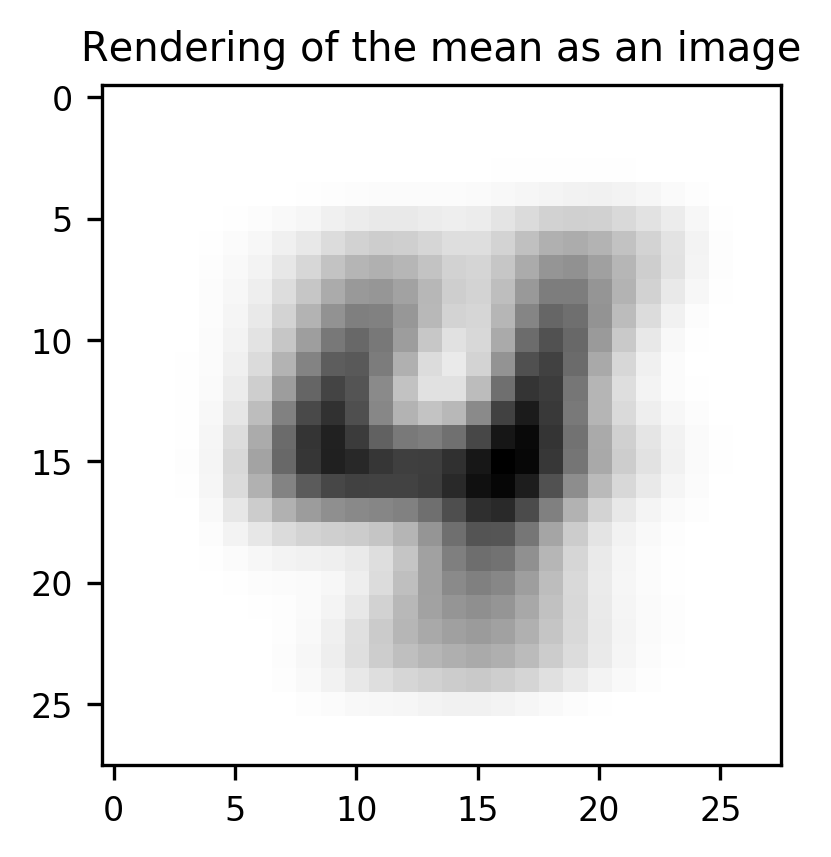

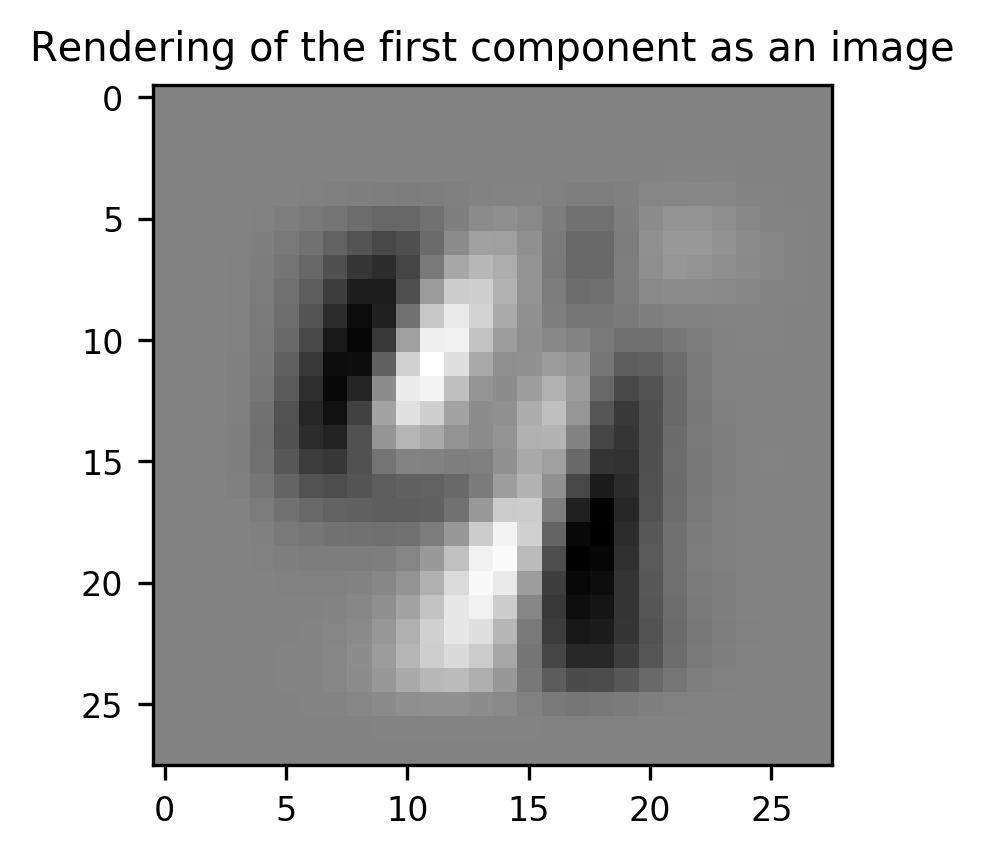

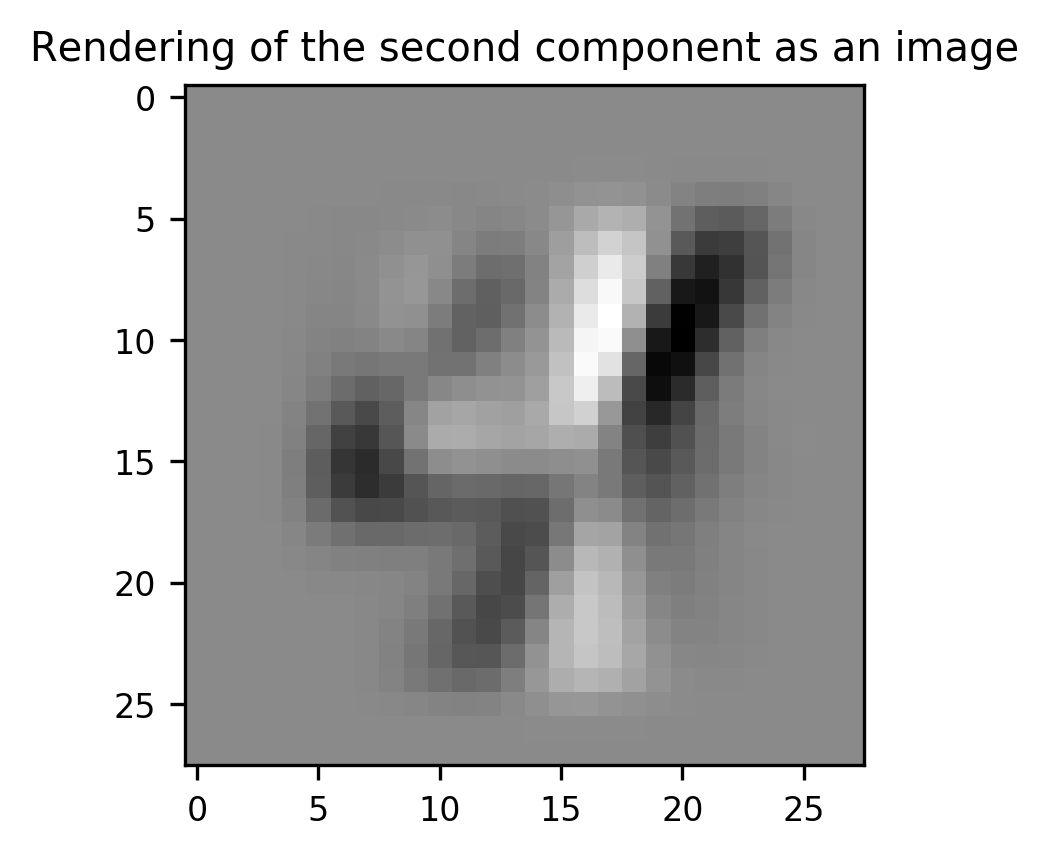

In [40]:
#Deel C tijd
#Get the mean Four image
meanFour = pca.mean_
pixels = np.array(meanFour, dtype='float')
pixels = pixels.reshape((28, 28))
imgplot = plt.imshow(pixels, cmap='gray_r')
plt.title("Rendering of the mean as an image")
plt.show()

#Obtain first principal component image
meanFirstPrincip = pca.components_[0]
pixels = np.array(meanFirstPrincip, dtype='float')
pixels = pixels.reshape((28, 28))
imgplot = plt.imshow(pixels, cmap='gray_r')
plt.title("Rendering of the first component as an image")
plt.show()

#Obtain second principal component image
meanSecondPrincip = pca.components_[1]
pixels = np.array(meanSecondPrincip, dtype='float')
pixels = pixels.reshape((28, 28))
imgplot = plt.imshow(pixels, cmap='gray_r')
plt.title("Rendering of the second component as an image")
plt.show()


As one can see, these pictures are more like the renderings of the points on the grid as images: rather blurry. In the first one the mean values are used, and one can see that in certain areas the color is completely white, from which it keeps turning a darker shade of grey until it is black. The areas which are black are those which are present in most if not all the images of a drawn 4 in the dataset. The darker grey areas are then quite often present, and the lighter the shade of gray the less common that particular pixel becomes. What remains is a very blurry image that can still be identified as a 4. 

The second image depicts the first component as an image. Judging by the intensity of the shade of gray, this might be related to both the postion and length on the end of the right line making up the four. The reason for this is that images on the right seem to have a much smaller lower end, where the horizontal line is thus placed much lower than for the images on the left hand side. The images on the left are also less slanted, making the part of the component that is deep black more likely to be present. 

The third image depicts the second component as an image. Judging by where the black spots are located in it, this component seems to be related to how slanted the lines making up the 4 are. This is also in line with the results of the previous two questions, as one can see when comparing the images on the right hand side to those on the left hand side, as become increasingly slanted the further they move to the right hand side. 

## 3 Projection onto a hyperplane (4 points)
Let $F$ be a $k$-dimensional hyperplane given by the parametric representation
$$ g(\lambda) = \mu + {\bf V} \lambda,$$
where $\mu \in \mathbb{R}^d$ and the columns of $\bf V$ are pairwise orthogonal and unit vectors $\bf v_1,\dots,\bf v_k \in \mathbb{R}^d$.
Let $f:\mathbb{R}^d\rightarrow F$ be the projection that maps every point ${\bf p} \in \mathbb{R}^d$ to its nearest point on $F$ (where distances are measured using the Euclidean distance). We can write the projection into the subspace spanned by $\bf v_1,\dots,\bf v_k$ as follows 
$$f({\bf p}) = {\bf V}^T ({\bf p}-\mu).$$

Prove that for any ${\bf p,\bf q} \in \mathbb{R}^d$, it holds that
$$ \|f({\bf p})-f({\bf q})\| \leq \|{\bf p-\bf q}\|. $$

(Hint: Assume first that $\mu=0$. Rewrite $f$ using a rotation followed by an orthogonal projection. What happens to the distance in each step? Generalize to arbitrary $\mu$.)


### Answer
#### Assume that $\mu=0$.

Note that: $f({\bf p}) = {\bf V}^T ({\bf p-0})) = {\bf V}^T{\bf p}$

Since the columns of ${\bf V}$ are pairwise orthogonal, the rows of ${\bf V}^T$ are also pairwise orthogonal.

A matrix is a rotation iff the rows are orthogonal, so ${\bf V}^T$ is a rotation. This means that the rows of ${\bf V}^T$ are pairwise orthogonal (which is indeed the case as stated in the assignment) and for all row vectors it holds that the length of the vector equals 1. It holds that the length of any vector is preserved under ${\bf V}^T$.

Thus,

$ \|f({\bf p})-f({\bf q})\| \leq \|{\bf p-q}\| $

$\Leftrightarrow$
$\|{\bf V}^T{\bf p}-{\bf V}^T{\bf q} \| \leq \|{\bf p-q}\| $

$\Leftrightarrow$
$\|{\bf V}^T({\bf p}-{\bf q})\| \leq \|{\bf p-q}\| $

Given the preserved lengths characteristic of rotation ${\bf V}^T$, it holds that $\|{\bf V}^T({\bf p}-{\bf q})\| = \|{\bf p}-{\bf q}\|$. Now we can write:

$\|{\bf V}^T({\bf p}-{\bf q})\| \leq \|{\bf p-q}\| $

$\Leftrightarrow$
$\|{\bf p}-{\bf q}\| \leq \|{\bf p-q}\| $, which is true.

#### Now we generalize to arbitrary $\mu$.

Note that: $f({\bf p}) = {\bf V}^T ({\bf p-\mu})) = {\bf V}^T{\bf p}-{\bf V}^T{\mu}$

$ \|f({\bf p})-f({\bf q})\| \leq \|{\bf p-q}\| $

$\Leftrightarrow$
$\|({\bf V}^T{\bf p}-{\bf V}^T{\mu})-({\bf V}^T{\bf q}-{\bf V}^T{\mu}) \| \leq \|{\bf p-q}\| $

$\Leftrightarrow$
$\|{\bf V}^T{\bf p}-{\bf V}^T{\mu}-{\bf V}^T{\bf q}+{\bf V}^T{\mu} \| \leq \|{\bf p-q}\| $

$\Leftrightarrow$
$\|{\bf V}^T{\bf p}-{\bf V}^T{\bf q}\| \leq \|{\bf p-q}\| $

$\Leftrightarrow$
$\|{\bf V}^T({\bf p}-{\bf q})\| \leq \|{\bf p-q}\| $

Again, given the preserved lengths characteristic of rotation ${\bf V}^T$, it holds that $\|{\bf V}^T({\bf p}-{\bf q})\| = \|{\bf p}-{\bf q}\|$. Now we can write:

$\|{\bf V}^T({\bf p}-{\bf q})\| \leq \|{\bf p-q}\| $

$\Leftrightarrow$
$\|{\bf p}-{\bf q}\| \leq \|{\bf p-q}\| $, which is true.



So it holds that, for any ${\bf p,q} \in \mathbb{R}^d$,

$ \|f({\bf p})-f({\bf q})\| \leq \|{\bf p-q}\|$ .

## 4 Locality-sensitive hashing (3 points, 1+2)

$H$ is a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions if it holds that
\begin{align}
\text{if}\quad d({\bf p,q})\leq d_1 \quad &\text{then}& \quad \Pr\left[ h({\bf p})=h({\bf q})\right] \geq p_1 \quad \\
\text{if}\quad d({\bf p,q})\geq d_2 \quad &\text{then}& \quad \Pr\left[ h({\bf p})=h({\bf q})\right] \leq p_2 \quad
\end{align}

### Case A: $p_2=0$
Assume that $p_2=0$ and assume we have a total numer of $m$ hash
functions from this family available.  Which combination of AND-constructions
and OR-constructions should we use to amplify the hash family?

### Answer A:
Ideally, one would have $p_1=1$ and $p_2=0$.


Using an AND-construction would not be usefull in this case:

$(d_1,d_2,p_1,p_2)$ would become $(d_1,d_2,p_1^r,p_2^r)$, where $1\leq r \leq m$. This means that $p_1^r \leq p_1$ and $p_2^r=0$ (because $p_2=0$), which does not amplify the hash family.


Using an OR-construction would be usefull in this case:

$(d_1,d_2,p_1,p_2)$ would become $(d_1,d_2,1-(1-p_1)^L,1-(1-p_2)^L)$, where $1\leq L \leq \frac{m}{k}$, and $k \leq m$. This means that $1-(1-p_1)^L \leq p_1$ because the term $(1-p_1)$ is 'deflated' due to L, which inflates the term $1-(1-p_1)^L$. Therefore, $Pr\left[ h({\bf p})=h({\bf q})\right]$ becomes larger, which is desired. Also, $1-(1-p_2)^L = p_2$, since $p_2 = 0$.

### Case B: $p_2=\frac{1}{n}$
Now assume that $p_2=\frac{1}{n}$ and assume we have $n$ data points ${\bf p \in P}$
which are stored in a hash table using a randomly chosen function $h$ from $H$.
Given a query point $\bf q$, we retrieve the points in the hash bucket with index $h(\bf q)$ to search 
for a point which has small distance to $\bf q$. 
Let $X$ be a random variable that is equal to the size of the set 

\begin{align}
\left\{{\bf p \in P}\,:\, h({\bf p})=h({\bf q}) \,\wedge\, d({\bf p,q}) \geq d_2\right\}\
\end{align}

which consists of the false positives of this query.

Derive an upper bound on the expected number of false-positives $\mathbb{E}\left[ X \right]$ using $p_2$. Explain each step of your derivation.

### Answer B:
Since $p_2 = \frac{1}{n}$, it holds that 
\begin{align}
\text{if}\quad d({\bf p,q})\geq d_2 \quad &\text{then}& \quad \Pr\left[ h({\bf p})=h({\bf q})\right] \leq \frac{1}{n} \quad
\end{align}

if $\Pr[h({\bf p})=h({\bf q})]$ would be equal to $0$, there would be no false positives. The upperbound of $\mathbb{E}\left[ X \right]$ therefore will be obtainen by using the largest possible value for $p_2$, which is $\frac{1}{n}$.

Then, in pseude-code

$\mathbb{E}\left[ X \right]$ = $\sum$ $\Pr[{\bf q}={\bf p}]$ $*$ (the number of points in ${\bf P}-1$) $*$ $\Pr[{h({\bf p})=h({\bf q}) \,\wedge\, d({\bf p,q}) \geq d_2}]$, where the first summation goes over all points ${\bf p \in P}$, and ${\bf P}-1$ is used because for any queried ${\bf q}$ it should hold that in calculations ${\bf p} \neq {\bf q}$.

So:
$\mathbb{E}[X] = \sum\nolimits_{\bf p \in P}$ $\Pr[{\bf q}={\bf p}]$ $*$ $(n-1)$ $*$ $\frac{1}{n}$

$\Leftrightarrow$
$\mathbb{E}[X] = n$ $*$ $\frac{1}{n}$ $*$ $(n-1)$ $*$ $\frac{1}{n}$

$\Leftrightarrow$
$\mathbb{E}[X] = \frac{n-1}{n}$

This number will appriximate 1 if $n$ goes to $\inf$.
